In [1]:
import warnings                                                                  # Importing all the required Libraries
warnings.filterwarnings('ignore')

import numpy as np                               
import pandas as pd                              
import matplotlib.pyplot as plt                  
import seaborn as sns            

from sklearn.metrics import mean_squared_error
from statistics import variance, mean

!pip install colorama
from colorama import Fore

%matplotlib inline

In [2]:
from google.colab import drive                                                   # Mounting Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
item_df = pd.read_csv('/content/IMPDS.csv')                                      # Reading Dataset

In [4]:
item_df.info()                                                                   # Looking at Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Period  78 non-null     int64  
 1   ItemTn  78 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.3 KB


In [5]:
item_df.head()                                                                   # Printing Data head

,Period,ItemTn
0,1,21.347928
1,2,23.687648
2,3,22.671080
3,4,16.862120
4,5,10.044660


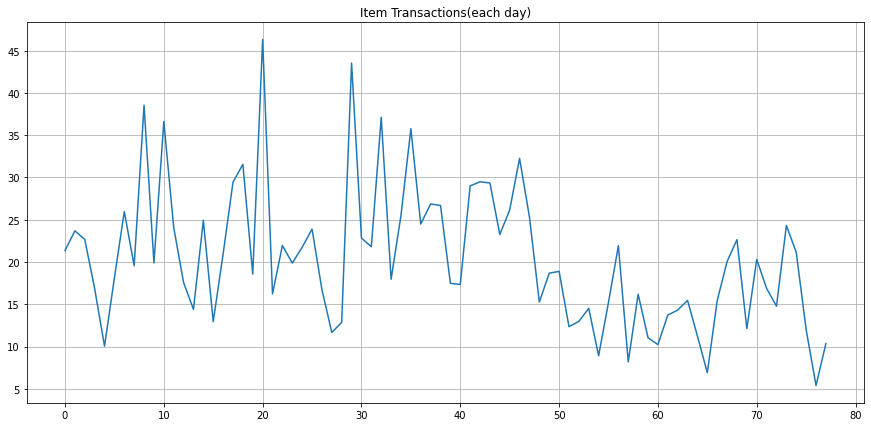

In [6]:
plt.figure(figsize=(15, 7))                                                      # Plotting ItemTn Coloumn
plt.plot(item_df.ItemTn)
plt.title('Item Transactions(each day)')
plt.grid(True)
plt.show()

## <b>Triple exponential smoothing

For Alpha 0.7, beta 0.08, gamma0.9 RMSE  score is : 3.8443263313362346
For Alpha 0.7, beta 0.1, gamma0.9 RMSE  score is : 3.9162036207009945
For Alpha 0.75, beta 0.08, gamma0.9 RMSE  score is : 3.735408279024558
For Alpha 0.75, beta 0.1, gamma0.9 RMSE  score is : 3.9030133081170293
For Alpha 0.8, beta 0.08, gamma0.9 RMSE  score is : 3.8180619855436273
For Alpha 0.8, beta 0.1, gamma0.9 RMSE  score is : 4.108452832216547
For Alpha 0.7, beta 0.08, gamma0.8 RMSE  score is : 3.9011063539521817
For Alpha 0.7, beta 0.1, gamma0.8 RMSE  score is : 4.0207482235099725
For Alpha 0.75, beta 0.08, gamma0.8 RMSE  score is : 3.8526532498559725
For Alpha 0.75, beta 0.1, gamma0.8 RMSE  score is : 4.074965483056528
For Alpha 0.8, beta 0.08, gamma0.8 RMSE  score is : 3.994752109628483
For Alpha 0.8, beta 0.1, gamma0.8 RMSE  score is : 4.3387686729842985
######################################################################################################################################################
At 

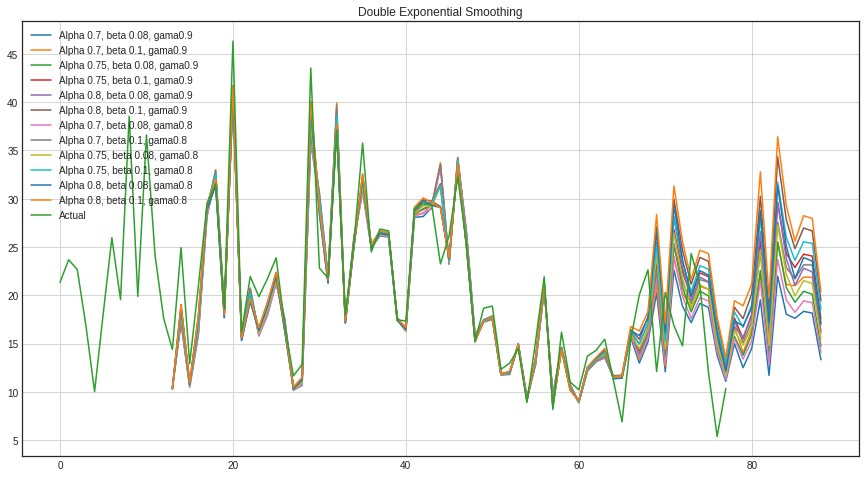




Doing Predictions Using Best Set of Hyper Parameters
For Alpha 0.75, beta 0.08, gamma0.9 RMSE  score is : 3.735408279024558
######################################################################################################################################################
At RMSE Score 3.735408279024558 following are the values : 
  Alpha is 0.75 
  Beta is 0.08 
  Gamma is 0.9
###################################################################################################################################################### 




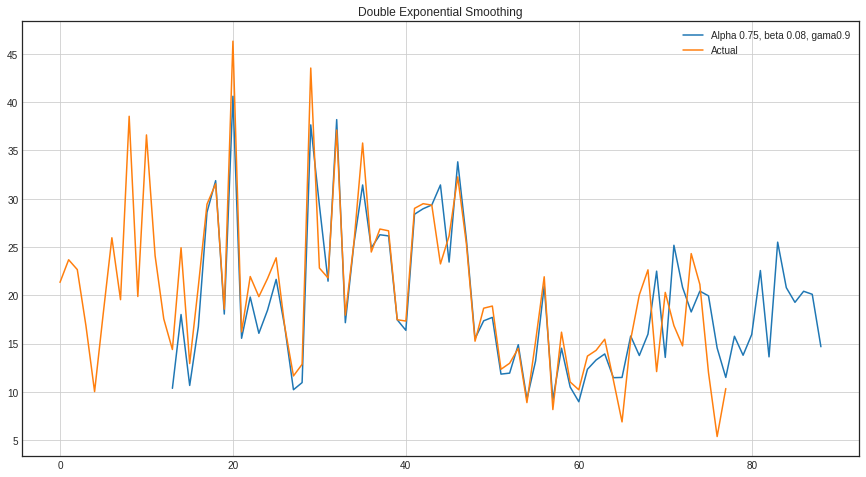

Following are the Future Predictions : [11.510842515613986, 15.792386746690545, 13.779564698109477, 15.990595739010807, 22.50748958118808, 13.583728217780683, 25.185742529142473, 20.833435125990974, 18.287755472320136, 20.440427718521615, 19.95057711063318, 14.557696420922069, 11.512410983991549, 15.769633996615056, 13.806856142432249, 15.955514999094477, 22.57150407996639, 13.641790255663219, 25.508840852581205, 20.798565298061703, 19.282707279100812, 20.426271235972695, 20.11420759084241, 14.68955905574579]


In [7]:
from pandas.core import series
class triple_exponential_smoothing():                                            # Creating Class with name triple_exponential_smoothing

  def __init__(self,series, alpha=0.75, beta=0.08, gamma=0.9):                   # Initializing the Class and setting default values of alpha, beta and gamma
    '''
    Initializing the Class triple_exponential_smoothing

    '''
    self.series=series
    self.alpha=alpha
    self.beta=beta
    self.gamma=gamma

  def seasonality_first_12_months(self):                                         # Creating Function seasonality_first_12_months
    '''
    Returns the seasonality for first 12 months                                  # Doc String 
    here:
     -> seasonality = sales of Month/ Average sales of year
    '''
    series_12_months= self.series[:12]
    seasonality=[]
    for num in series_12_months:
      seasonality.append(num/series_12_months.mean())                            # Calculating and Storing Past Year Seasonality
    return seasonality

  def setting_up_initail_values(self):                                           # Creating function setting_up_initail_values
    '''
    Return the initial values of Level and Trend
    here, we are seasonaly adjusting our data 
    formula used:
      for level : 
        -> sales of Month/ sesonality of month in past year
      for trend:
        -> seasonaly adjusted sales for the month/seasonaly adjusted sales for
                                                   the previous month

    '''
    seasonality=self.seasonality_first_12_months()
    
    initial_level=self.series[12]/seasonality[0]                                 # Calculating Value of initial Level
    seasonality_adjusted_sales_prev_month= self.series[11]/seasonality[-1]

    initial_trend= initial_level- seasonality_adjusted_sales_prev_month          # Calculating Initial Trend
    return initial_level, initial_trend, seasonality

  def variance_over_the_years(self, seasonality_of_past):
    '''
    This function helps us find the variance of each month over the years of 
    data to capture the noise and making prediction more accurate
    '''
    variance_dict={}
    count_min=0
    for i in range(12):
      temp_list=[]
      for j in range(count_min,54,12):
        temp_list.append(seasonality_of_past[j])                                 # Storing seasonality of each month in the list
      count_min+=1
      m=mean(temp_list)
      variance_dict[count_min]=variance(temp_list, xbar = m)                     # variating dict month as key and variance as values
    return variance_dict


  def forecast(self):
    '''
    this function do the forcast, it takes seasonality, trend and Level into
    Consideration in Forcasting 

    It returns a list of all the Forcast
    '''
 
    initial_level, initial_trend, seasonality=self.setting_up_initail_values()
    f_series=np.array(self.series[12:-12])

    result = []
    for n in range(1, len(f_series)-1):
      if n==1:                                                                   # For n=1 Value of Level and Trend will be equal to initial valus
        level, trend=initial_level,initial_trend
        seasonality.append(self.gamma*f_series[0]/level+(1-self.gamma)*seasonality[0])

      if n >= len(f_series):                                                     # This is the Point After which Future Forecasting Happens
        value = result[-1]  
      else:
        value=f_series[n]
      
      last_level, level = level, self.alpha*value/seasonality[n] + (1-self.alpha)*(level+trend)
      trend = self.beta*(level-last_level) + (1-self.beta)*trend
      seasonality.append(self.gamma*value/level+(1-self.gamma)*seasonality[n])
      result.append((level+trend)*seasonality[-13:][0])

    variance_dict=self.variance_over_the_years(seasonality)

    months_to_predict=24
    rigid_seasonality = seasonality[-13:-1]                                      # Saving the Seasonality of past 12 Months

    current_seasonality=[]                                                       # Updating current seasonality in accordance to past
    for num, i in enumerate(rigid_seasonality):                       
      current_seasonality.append(i+variance_dict[num+1])

    count=0
    for months in range(2,months_to_predict+2):
      result.append((level+months*trend)*current_seasonality[count])
      count+=1
      if count==12:
        temp_list=[]
        for num, i in enumerate(current_seasonality):                            # Updating the Seasonality for year next year
          temp_list.append(i+variance_dict[num+1])
        current_seasonality=temp_list

        count=0
    return result, seasonality

def plotExponentialSmoothing(series, alphas, betas, gammas,Print=None):
  """
      Plots function will help us tune our values for different 
      alpha and beta and gama
      
      series - dataset with timestamps
      alphas - list of floats, smoothing parameters for level
      betas - list of floats, smoothing parameters for trend
      gammas - list of floats, smoothing parameters for trend
   """
  rmse_dict={}
  rmse_score=None
  with plt.style.context('seaborn-white'):    
      plt.figure(figsize=(15, 8))
      for gamma in gammas:
        for alpha in alphas:
            for beta in betas:
              result, _=triple_exponential_smoothing(series, alpha , beta, gamma).forecast()
              final_result=[None for i  in range(13)]
              
              for val in result:
                final_result.append(val)
              future_predictions= final_result[-24:]
              
              root_mean_square_error= np.sqrt(mean_squared_error(final_result[13:-11], item_df.ItemTn.values[13:]))
                                                                                 # Calculating RMSE Score
              if Print:
                print(f"For Alpha {alpha}, beta {beta}, gamma{gamma} RMSE  score is : {root_mean_square_error}")
                                                                                 # Printing the Values of alpha, Beta, Gamma and Rmse at each Iteration
              if rmse_score is None:
                rmse_score=root_mean_square_error
                rmse_dict['Alpha'],rmse_dict['Beta'],rmse_dict['Gamma']=alpha, beta, gamma
              elif rmse_score>root_mean_square_error:                            # Storing the Best RMSE Score and Values of Alpha, Beta and Gamma
                rmse_score=root_mean_square_error
                rmse_dict={}
                rmse_dict['Alpha'],rmse_dict['Beta'],rmse_dict['Gamma']=alpha, beta, gamma

              
              plt.plot(final_result, label="Alpha {}, beta {}, gama{}".format(alpha, beta, gamma))
                                                                                 # Plotting Predicted Values
      print('#'*150)
      print(Fore.RED+f"At RMSE Score {rmse_score} following are the values : {Fore.GREEN}\n  Alpha is {rmse_dict['Alpha']} \n  Beta is {rmse_dict['Beta']} \n  Gamma is {rmse_dict['Gamma']}")
      print('#'*150,'\n\n')                                                      # Printing the Best scores and parameters
      plt.plot(series.values, label = "Actual")                                  # Plotting the Actual Values
      plt.legend(loc="best")
      plt.axis('tight')
      plt.title("Double Exponential Smoothing")
      plt.grid(True)
      plt.show()


      return rmse_dict, future_predictions

rmse_dict,_=plotExponentialSmoothing(item_df.ItemTn, alphas=[0.7, 0.75,0.8], betas=[0.08,0.1], gammas=[0.9, 0.8], Print=True)
alphas_best, betas_best, gammas_best= rmse_dict['Alpha'], rmse_dict['Beta'], rmse_dict['Gamma']
print(Fore.BLUE+ '\n\n\nDoing Predictions Using Best Set of Hyper Parameters')
_, future_predictions=plotExponentialSmoothing(item_df.ItemTn, alphas=[alphas_best], betas=[betas_best], 
                          gammas=[gammas_best], Print=True)
print(Fore.GREEN+f'Following are the Future Predictions : {future_predictions}')